In [2]:
%pip install -q top2vec[sentence_transformers]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mplcursors
import plotly.express as px
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances
from bertopic import BERTopic
from copy import deepcopy
from top2vec import Top2Vec
from wordcloud import WordCloud, STOPWORDS
from reportlab.pdfgen import canvas

In [2]:
df=pd.read_csv(r"scopus_12Jan2022_processed_articles_SJR_tm_q1q2_cleaned.csv",encoding="ISO-8859-1")
df.head()
docs=list(df.loc[:,"text"].values)

In [3]:
model=BERTopic(language="english")
topics,probs=model.fit_transform(docs)

In [ ]:
model.visualize_barchart(top_n_topics=10)

In [ ]:
model.visualize_heatmap()

In [ ]:
model.visualize_hierarchy()

In [9]:
model.get_topic(0)

[('succession', 0.043716828701487624),
 ('successor', 0.016639856984844117),
 ('the', 0.015835729336658666),
 ('successors', 0.01546540502470772),
 ('of', 0.013492479630445198),
 ('to', 0.013424138119993588),
 ('business', 0.012648929215864616),
 ('planning', 0.012585021422487281),
 ('process', 0.012523935842470245),
 ('family', 0.01223605674242932)]

In [ ]:
model.visualize_topics()

In [4]:
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')
embeddings = model.encode(docs)

embeddings.shape  
#what other models of BERT are there?  

(3901, 768)

In the above code we incoporate a previously trained model of BERT namely distilbert-base-nli-stsb-mean-tokens which is a sentence transformer into the model.This sentence-transformers model maps sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [5]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5,
                            min_dist=0.0,
                            metric='cosine').fit_transform(embeddings)
umap_embeddings.shape

(3901, 5)

In [20]:
umap_embeddings

array([[11.497837 ,  2.1094353,  5.2993603,  4.57751  ,  8.727821 ],
       [13.413499 ,  3.5400372,  6.373151 ,  5.032006 ,  8.27225  ],
       [14.32574  ,  3.94065  ,  5.7057652,  6.0881605,  8.586651 ],
       ...,
       [12.334553 ,  2.9053996,  4.209975 ,  4.872637 ,  7.7117414],
       [ 7.906032 ,  6.931093 ,  7.367223 ,  2.7105365,  5.6226616],
       [11.41569  ,  3.4831805,  6.1700187,  4.781561 ,  7.3971925]],
      dtype=float32)

In [ ]:
plt.scatter(*umap_embeddings.T, s=50, linewidth=0, c='b', alpha=0.25)

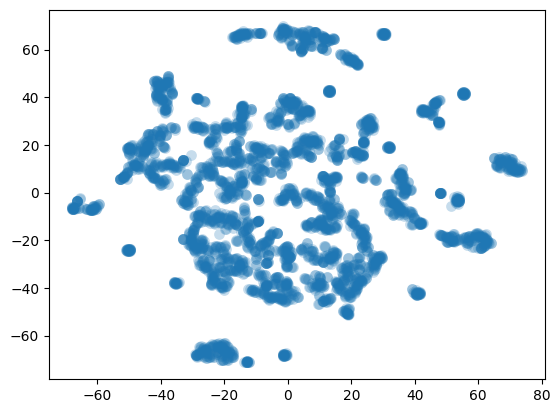

In [6]:
plot_kwds={'alpha':0.25, 's':60, 'linewidths':0}
projection = TSNE().fit_transform(umap_embeddings)
plt.scatter(*projection.T, **plot_kwds)

In [7]:
cluster = hdbscan.HDBSCAN(min_cluster_size=18, 
                          metric='euclidean'
                          )
labels=cluster.fit_predict(umap_embeddings)
print(f"Number of clusters = {np.unique(cluster.labels_).shape[0] - 1}")

Number of clusters = 27


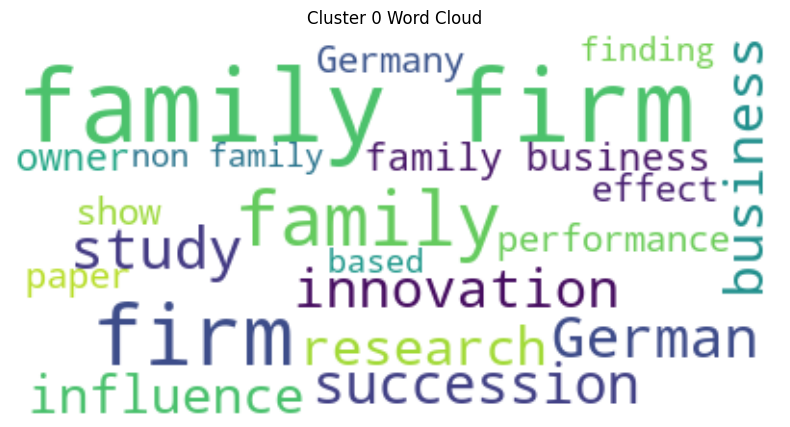

Top Documents containing 'family' in Cluster 0:
New digital technologies have prompted many firms, including family firms, to innovate their business models. We study the role of dynamic capabilities as mediator in the relationship between family influence and digital business model innovation (BMI), and the moderating role of environmental dynamism. Based on unique survey data from 1,444 German firms with and without family influence, we reveal that knowledge exploitation, risk management, and marketing capabilities mediate the positive relationship between family influence and digital BMI. Surprisingly, and contrary to our assumption, we find that the positive relationship between family influence and dynamic capabilities is weakened rather than strengthened by environmental dynamism. Our findings hold important implications for family business innovation and digital BMI research, offering valuable insights into the role of dynamic capabilities and environmental dynamism in the digit

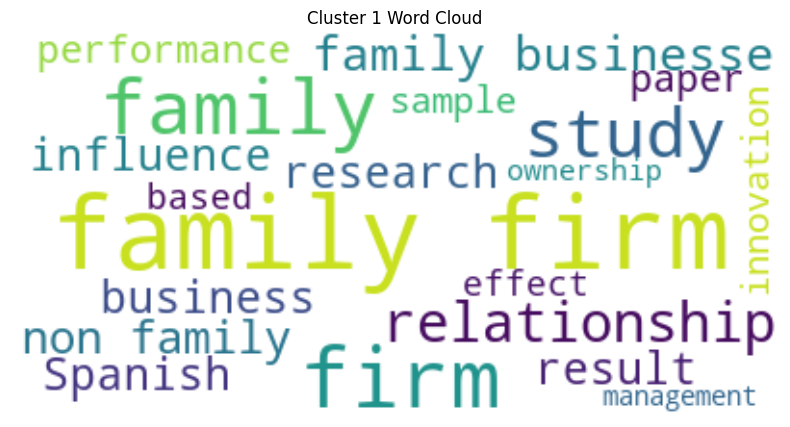

Top Documents containing 'family' in Cluster 1:
 This study investigates the impact of the CEO's financial literacy on family SMEs' growth, as well as the moderating role of the generational stage on this relationship.  The study is based on survey data of Spanish private family firms and utilizes a second source of data, the SABI database by Bureau Van Dijk. The authors run ordinary least squares regressions and use both the base and the partition approaches to test the hypotheses.  The analysis reveals a positive association between the CEO's financial literacy and firm growth. However, this relationship is not uniform across generations. The CEO's financial literacy-firm growth relationship becomes weaker for first- and third or subsequent-generation family firms while becoming stronger for second-generation family firms.  This study adds the financial literacy of the CEO as a novel individual-level determinant of family firm growth. It also shows that CEOs do not always use their f

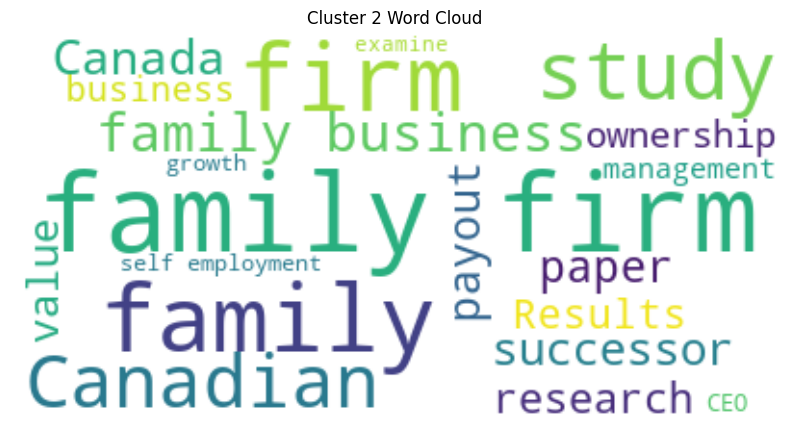

Top Documents containing 'family' in Cluster 2:
Family businesses represent 80% of global business structures, but the low rate of successful transgenerational succession can have drastic implications for employees and local economies. A 12-year longitudinal study of 89 Canadian family businesses revealed that successors confidence and perceptions of incumbent support predicted successor intrinsic motivation to take over the business, which in turn predicted whether the business was successfully transferred 12 years later. Incumbent support and intrinsic motivation mediated the relation between incumbent trust in the successor and successful business succession. This study demonstrates the dual importance of incumbent and successor psychological states in determining succession outcomes. 
Considerable research focuses on why internal migration rates are declining across most of the Western world. Several studies also look at why people are less likely to change jobs than they were in t

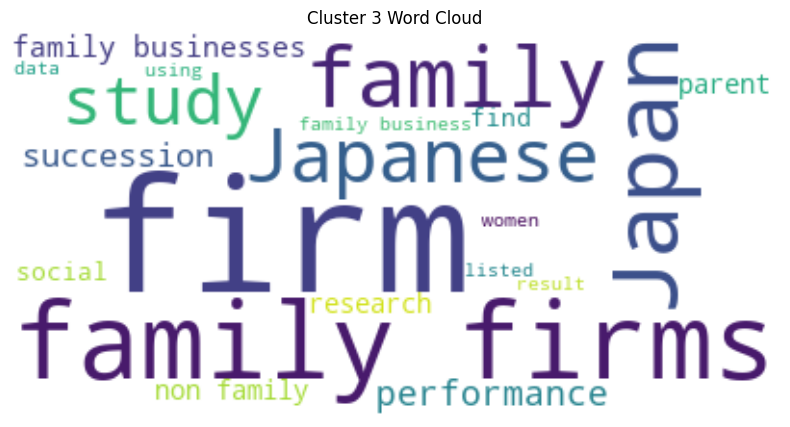

Top Documents containing 'family' in Cluster 3:
 The purpose of this paper is to identify the important factors for sustainability in Japanese family businesses. Family businesses in Japan are well prepared in succession planning and have the greatest longevity of any in the world.  In this study, 15 family businesses in Japan were explored in the food and beverage, confectionary, services, handicraft, pharmaceuticals and manufacturing sectors.  The important sustainability factors identified in this study, innovation, competitive advantage, leadership and team management, and establishing good relationships with the local community are the key steps for achieving family business succession.  Startups and new family businesses in other countries can learn how to run a company successfully based on the Japanese model by applying the keys to success. 
This study investigates whether innovation activities conducted by family firms in Japan can be distinguished from those carried out by no

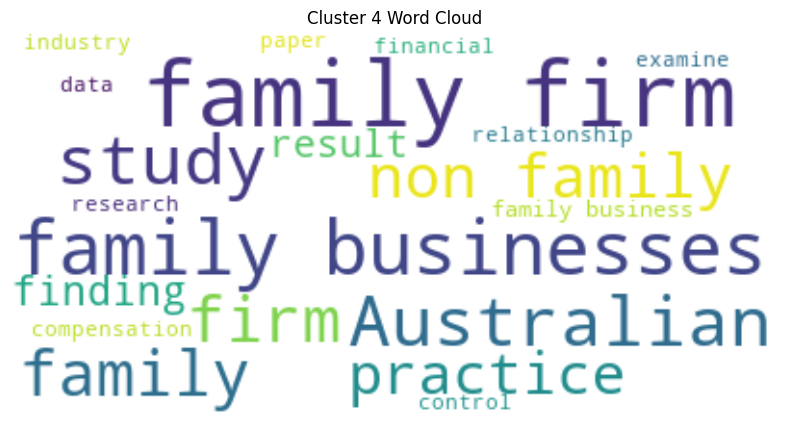

Top Documents containing 'family' in Cluster 4:
 The purpose of this study is to analyse the level and structure of executive compensation of family and non-family businesses and if minority shareholders are expropriated by family businesses in the Australian context using excessive pay. Studies on compensation practices of family businesses are limited to the European and North American contexts. This study, for the first time, considers the Australian context, which is unique with its transparent compensation disclosures, and a principle-based corporate governance framework to examine the level of compensation as well as the association between pay and performance.  A set of family and matched non-family firms for the period 2004-2014 are examined in a panel data setting. Robust models are estimated to examine the association between compensation and a set of economic, governance and ownership factors.  This study finds evidence that family businesses in general pay lower levels of c

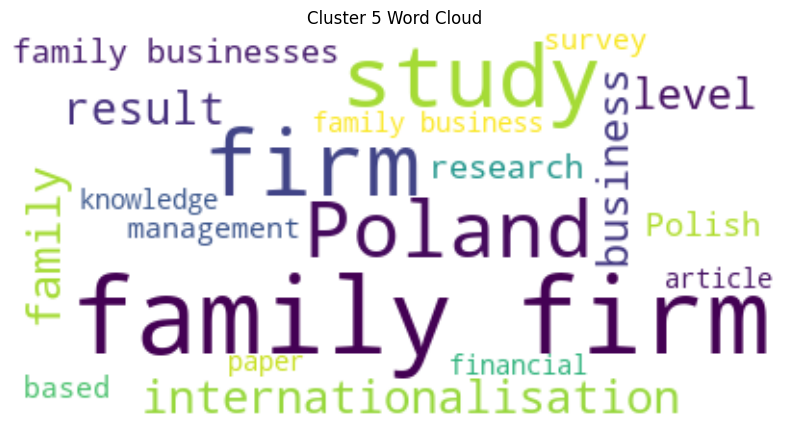

Top Documents containing 'family' in Cluster 5:
There is a widespread belief that the initial period of running an economic entity can be critical, due to the limited experience of a new entrepreneur and as a result of the shortage of resources for the development of a family business. Until now, there have been no studies of changes in farms in the short term resulting from intergenerational succession, i.e. transfers of farms. This paper fills that gap. Using the methods of counterfactual modelling and the panel data representative for Polish commercial farms, the study attempts to answer the question of whether and to what extent the positive, negative or neutral economic effects of the intergenerational transfer have been observed in the farms surveyed. The analyses showed that, on average, family succession did not translate into a reduction of production potential of the farms analysed and did not cause a deterioration in their economic performance. The results of counterfactual 

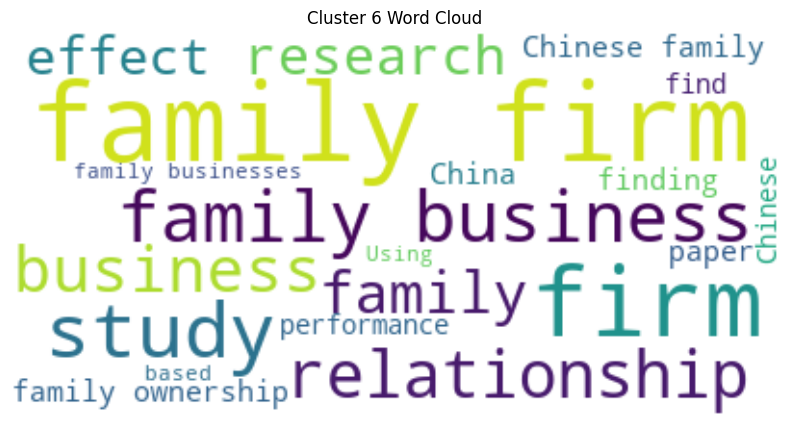

Top Documents containing 'family' in Cluster 6:
It has been conventional wisdom that entrepreneurs frequently anthropomorphize their businesses by referring them as their babies and using biological cycle as metaphors to depict their business development. Building upon the Social Cognitive Theory, this study purports to examine the untapped influence of anthropomorphism on entrepreneur's business decision. Using a sample of Indonesian entrepreneurs, we substantiate the conjecture that anthropomorphism positively affects entrepreneur's resilience. This relationship is explained by an increase in perceived business reputation. Furthermore, we provide evidence that the indirect relationship is attenuated when the business is a family business. The findings of this study have several theoretical contributions and practical implications for policy makers and social marketing that promote entrepreneur's resilience. 
We investigate the impact of family firms on the cost of borrowing in East 

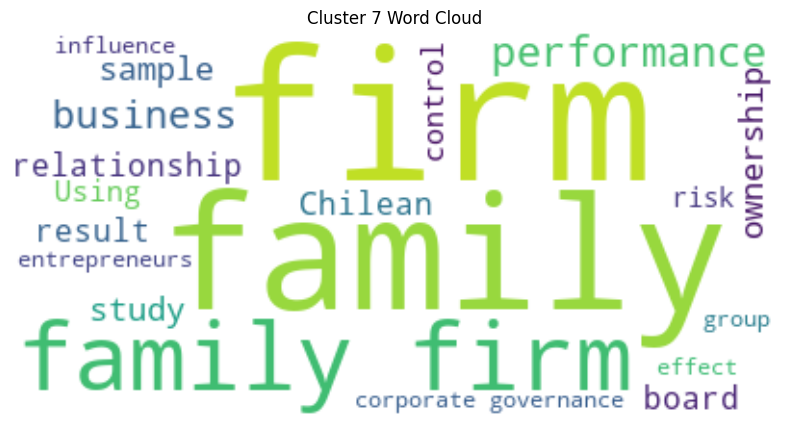

Top Documents containing 'family' in Cluster 7:
An economic group is a collection of parent and subsidiary corporations that operates as a single economic organism under the same legislature of control. The decisions taken by the economic groups in any country are among the most influential factors that impact its market and the countrys economic political scenario. This work studies the impact of the Ecuadorian economic groups from 2015 to 2019, where a historical peak of 300 economic groups was reached. However, the taxes representativeness of the Ecuadorian economic groups remained stable during the same period of analysis. We analyzed the financial and fiscal variables of the Ecuadorian ranking of firms, and detected the following of its economic groups: (i) They are still concentrating wealth despite the implementation of hard government policies to transparent the financial and economic information; (ii) They tend to compete in oligopolistic markets, given that their economic and

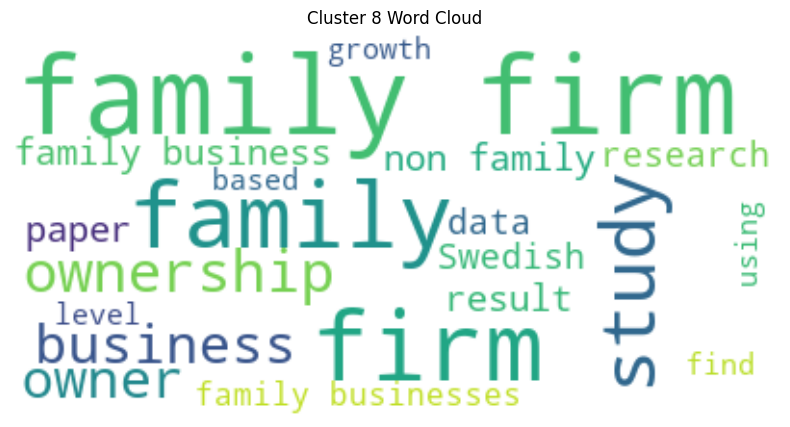

Top Documents containing 'family' in Cluster 8:
We theorize that due to their ability to draw upon the distinctive bonding and bridging social capital resources of their family firm parents, family member spawns have longer early survival times than nonfamily member spawns from family firms, which in turn should have longer early survival times than spawns from nonfamily firm parents. We also predict that the survival enhancing effects of family parent bonding and bridging social capital are conditional on the spatial, cognitive and social proximity between the parent and the spawn. Using a population wide sample of 114,837 spawns founded in Sweden between 2000 and 2007, we find that nonfamily member spawns survive longer than spawns from nonfamily firms, and that this survival enhancing effect is contingent on the spatial and social proximity between the spawn and its parent. We also find that spawns founded by family members, on average, do not survive longer than spawns from family 

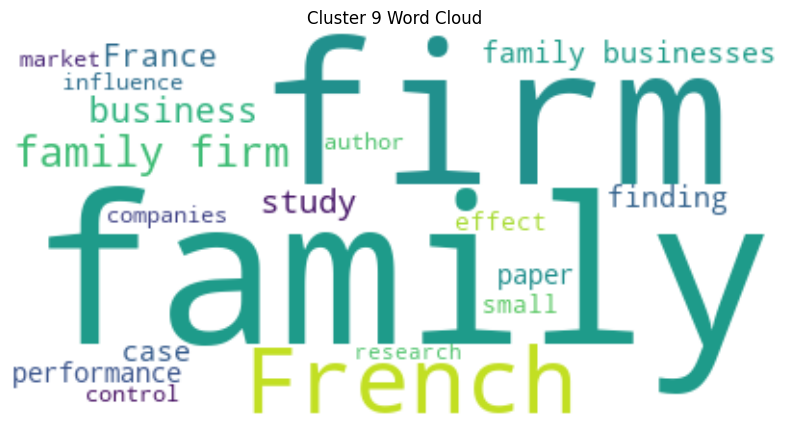

Top Documents containing 'family' in Cluster 9:
 The purpose of this paper is to examine the effect of the emotional attachment strength of family members to their business on the quality of the voluntary disclosure of their key performance indicator (KPI). More specifically, the authors focused on the effect of two dimensions of the socio-emotional theory, i.e. family influence and control and firm dynasty succession.  The authors performed a content analysis of annual reports for a sample of 87 French families listed in CAC All-Tradable to calculate a disclosure quality index of KPI. The authors proxied the family influence and control by the proportion of family members appointed in the board. To identify the firm dynasty succession concern, the authors classified firms according to the generation they belonged to. The authors estimated a cross-sectional linear regression model to meet the research objective.  This study confirms the role of the family affective attachment in de

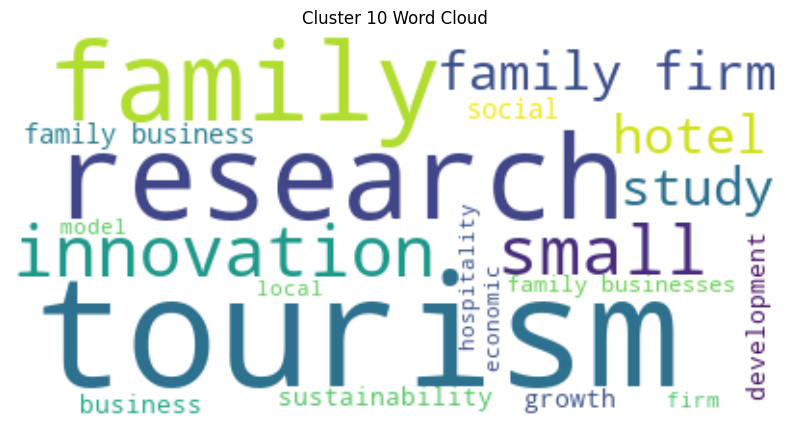

Top Documents containing 'family' in Cluster 10:
Family businesses are of particular economic relevance in the international hospitality and tourism industry. However, there are few studies that address their specific characteristics and objectives. The aim of this study is to produce a bibliometric overview that reveals the structure underpinning the analysis of the tourism family business in the business and management research field. The study also reveals the evolution of this research over time, as well as the most relevant related concepts and study gaps. Through a keyword cooccurrence analysis and a systematic review of 129 studies on tourism family businesses published between 1997 and 2020, the main contributions were organized into four thematic clusters, which include specific theoretical approaches. The clusters are Entrepreneurship, Marketing Orientation and Innovation Performance; Capabilities and Competitiveness; Sustainability; and Strategy and Economic Performance. On

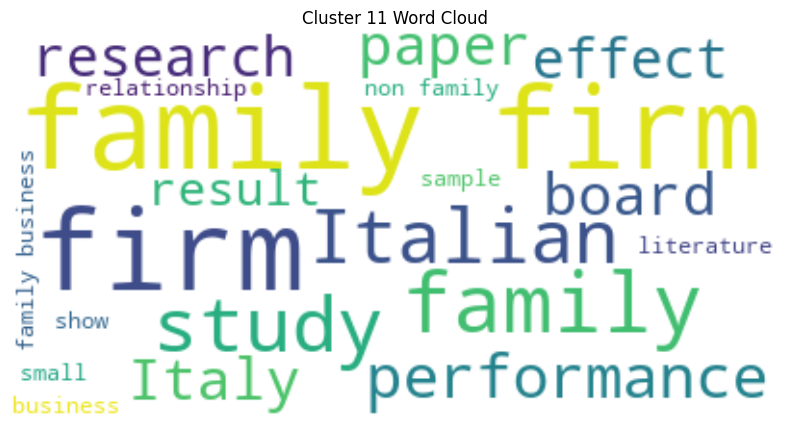

Top Documents containing 'family' in Cluster 11:
A growing literature is devoted to understand how companies react to major external shocks. Contributing to this research, we study how the presence of families in corporate ownership and leadership affected the reaction of firms to the Covid-19 pandemic. Using data from Italy, we find that family firms exhibited higher market performance and operating profitability than other firms during the pandemic period. This result is stronger for companies without relevant minority investors and with multiple family shareholders. Delving into the mechanisms, we show that the outperformance of family firms is driven by a more efficient use of labor and a lower drop in revenues. Collectively, our results expand existing research by showing how family ties shape the response to adverse events. 
This study explores the role of external audiences in determining the importance of family firm brands and the relationship with firm performance. Drawing on

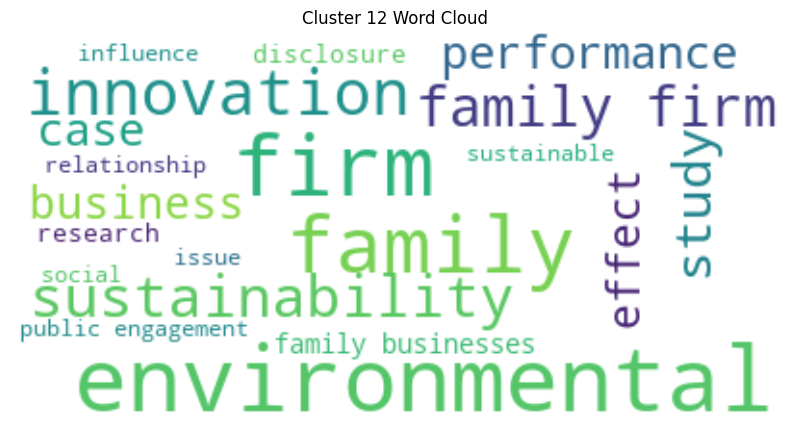

Top Documents containing 'family' in Cluster 12:
The effect of family ownership on the environmental performance of firms has been increasingly investigated in the economic and business literature, adopting various theoretical frameworks. Nonetheless, only limited empirical research is available, especially in cross-country contexts. Integrating socioemotional wealth (SEW) and stewardship perspectives with institutional theory, this study provides evidence on the relationship between family firms and environment-friendly practices (EFP), highlighting the moderating role of regulatory pressure. Drawing on Enterprise Surveys (ES) conducted in 2018-2020 and applying multiple regression analyses, family ownership is found to be positively associated with the propensity to engage in pollution prevention and control. This evidence corroborates the idea that ceteris paribus SEW and reputational assets associated with family businesses can leverage the tendency of firms to mitigate their envir

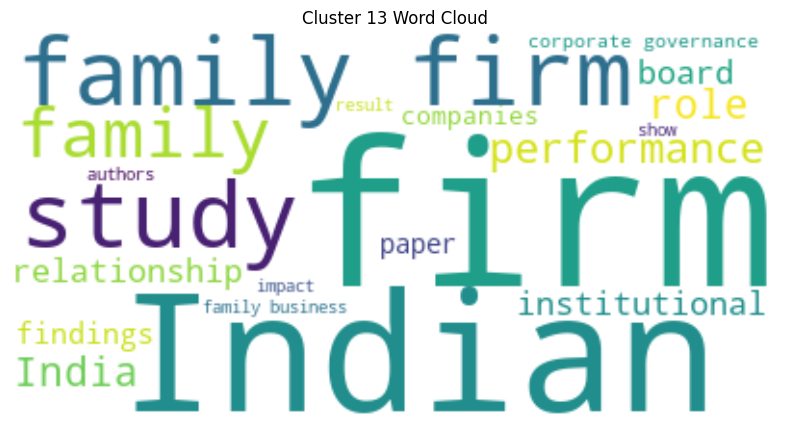

Top Documents containing 'family' in Cluster 13:
Little attention has been given to the role of interpersonal relationships in building the leadership skills of next-generation successors, with most literature focusing on the development of their business and technical skills. Drawing on Leader-Member Exchange (LMX) theory, we qualitatively explore how high-quality relationships develop between next-generation leaders and family and non-family stakeholders and how they impact leadership development. Findings from interviews with 24 next-generation leaders of family businesses in India show that high-quality relationships develop through mutual respect, trust, early affiliation with the business, mentoring, and mutual obligation. By exploring how high-quality relationships develop between next-generation family business leaders and family and non-family stakeholders, we contribute to a finer-grained understanding of successful intergenerational succession in family businesses. We also c

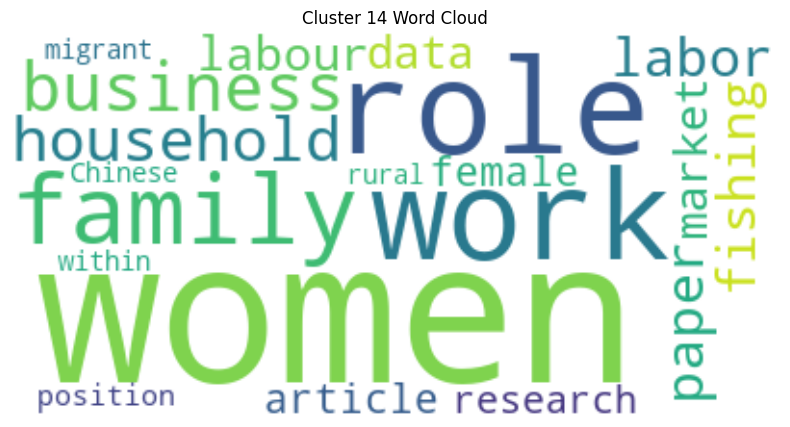

Top Documents containing 'family' in Cluster 14:
Estimated labor force participation rates among free women in the pre-Civil War period were exceedingly low. This is due, in part, to cultural or societal expectations of the role of women and the lack of thorough enumeration by Census takers. This paper develops an augmented labor force participation rate for free women in 1860 and compares it with the augmented rate for 1920 and today. Our methodology identifies women who are likely providing informal and unenumerated labor for market production in support of a family business, that is, unreported family workers. These individuals are not coded in the original data as formally working, but are likely to be engaged in the labor force on the basis of the self-employment of other relatives in their household. Unreported family workers are classified into four categories: farm, merchant, craft, and boardinghouse keepers. Using microdata, the inclusion of these workers more than triples the

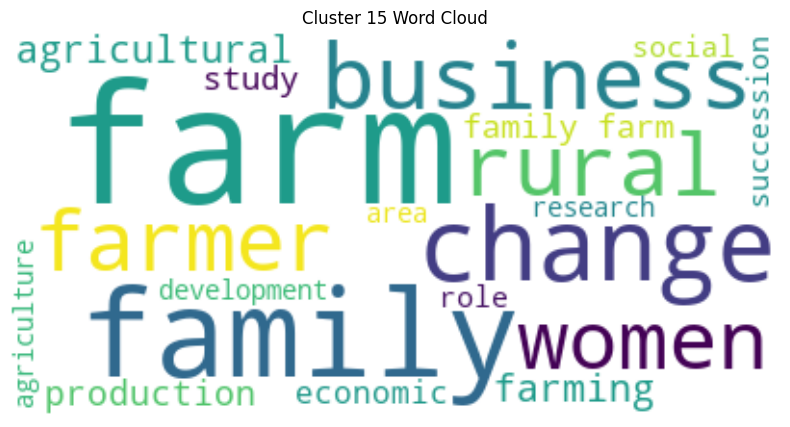

Top Documents containing 'family' in Cluster 15:
In Uganda, the agricultural sector contributes substantially to gross domestic product. Although the involvement of Ugandan women in this sector is extensive, female farmers face significant obstacles, caused by gendering that impedes their ability to expand their family business and to generate incomes. Gender refers to social or cultural categories by which women-men relationships are conceived. In this study, we aim to investigate how gendering influences the development of business relationships in the Ugandan agricultural sector. To do so, we employed a qualitative- inductive methodology to collect unique data on the rice and cassava sectors. Our findings reveal at first that, in the agricultural sector in Uganda, inter-organization business relationships (i.e., between non-family actors) are mostly developed by and between men, whereas intra-organization business relationships with family members are mostly developed by women. We l

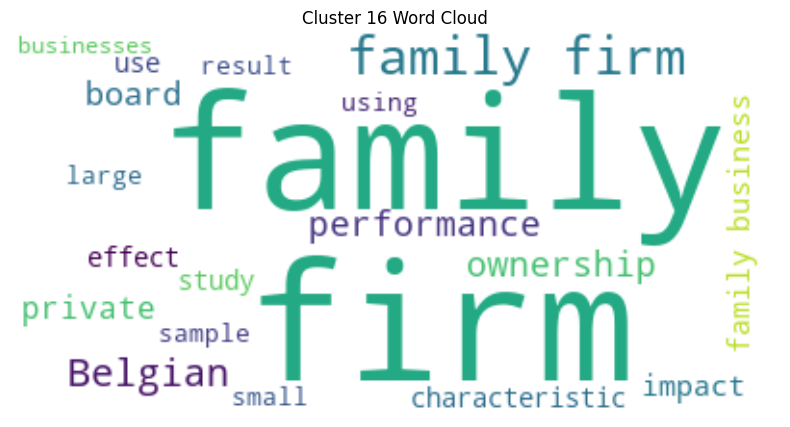

Top Documents containing 'family' in Cluster 16:
To pass or not to pass through the news gates? That is a key question with respect to the relationship between large commercial firms and the journalistic outlets that pub­lish news regarding them. Whereas previous research has considered how corporate communication affects media content, the focus of this study is on corporate characteristics (e.g. company size, age, location and ownership structure). Building on the gatekeeping approach, the study investigates the extent to which these characteristics affect corporate visibility in the news and tone of coverage. The characteristics of 100 large corporations in the Netherlands were combined with visibility and tone in Dutch online and print news throughout 2014 (N = 29,516). The results indicate that having more employees, being owned by the government and focusing on consumers add substantially to the explanation of corporate visibility. Furthermore, our results indicate that governmen

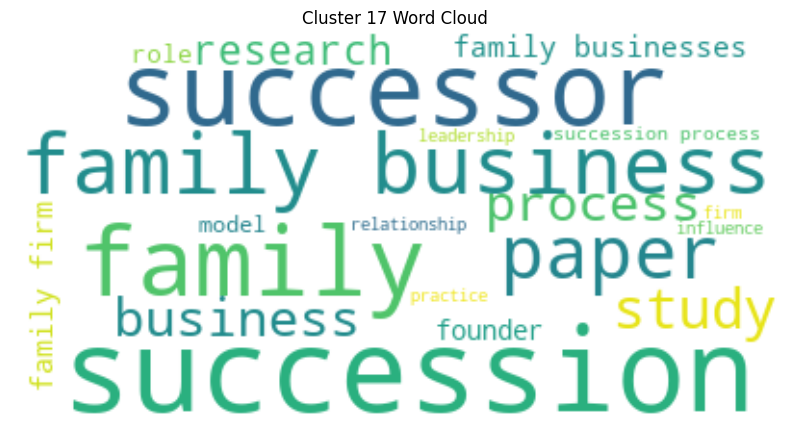

Top Documents containing 'family' in Cluster 17:
 As widely known and well established, strategic decision-making at family firms is an interface between business interests and family considerations. The purpose of this paper is to understand the underlying basis of decision-making in setting corporate strategy and designing chief executive officer (CEO) compensation at founder- vis-Ã -vis descendant-led family firms in the Indian pharmaceutical sector.  A sample of 106 BSE-listed pharmaceutical companies have been studied over the period 2012-2017 resulting in a total of 636 firm-year observations. Impact of family involvement in business (FIB) on corporate strategy and CEO compensation has been analysed by constructing multivariate panel data regression models. To deal with the problem of endogeneity, Arellano-Bond (1991) dynamic panel data estimation procedure has moreover been conducted.  Supporting stewardship theory, founder-owned and governed firms have been found to favour grow

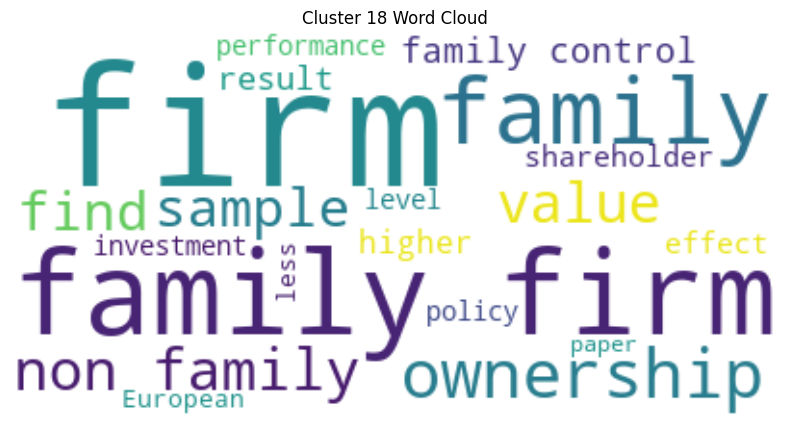

Top Documents containing 'family' in Cluster 18:
This paper investigates firms cash flow sensitivity of cash (CFSC) in a European setting. We examine the differing effects of financial constraints and income and substitution effects on CFSC in the context of the family ownership structure. When examining the shareholders behavior within the ownership structure of family firms, we find a positive CFSC level for our full sample. Our results show a significant connection between the family ownership structure and CFSC's determinant factors: the higher (lower) sensitivity for the firms with more (less) financial constraints suggests that family firms are financially less constrained than non-family firms. Additionally, contrary to prior literature, we find income and substitution effects have a nonnegative effect on CFCS. We explain this finding from a productivity shocks perspective related to the financial crisis, which occurs during our analysis period. 
Using firm-level data, we estima

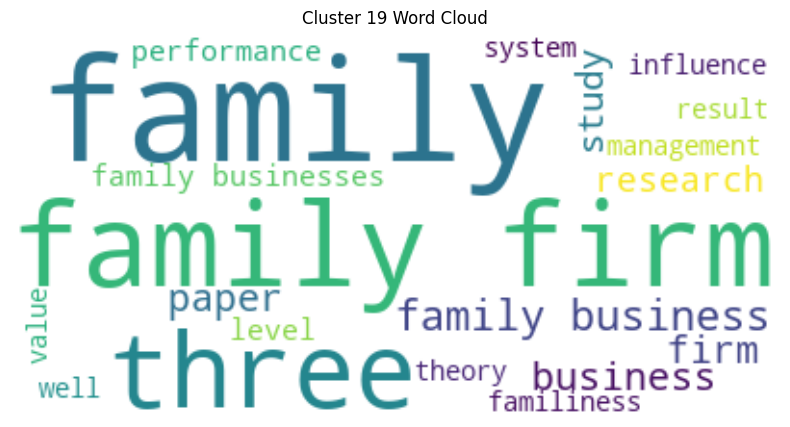

Top Documents containing 'family' in Cluster 19:
This article expands family business and CSR research in a number of ways. Its first purpose is to redesign two core corporate social responsibility (CSR) theories (stakeholder theory and Carroll's CSR pyramid), enhancing their relevance for the family business domain. This extension is built by incorporating familiness and SEW as components of family business social responsibility (FBSR), respectively as basis for ethical behavior and as idiosyncratic value system for decision-making. Second, by positioning the ownership system, the business system, and the family system at the hub of its constellation of stakeholders, three configurations are produced: instrumental (doing good in order to do well), normative (doing well and doing good) and dynastic (doing good through doing well). The expanded versions of theory and ensuing configurations have value to both the domain of CSR and that of family business; the theorization of family busin

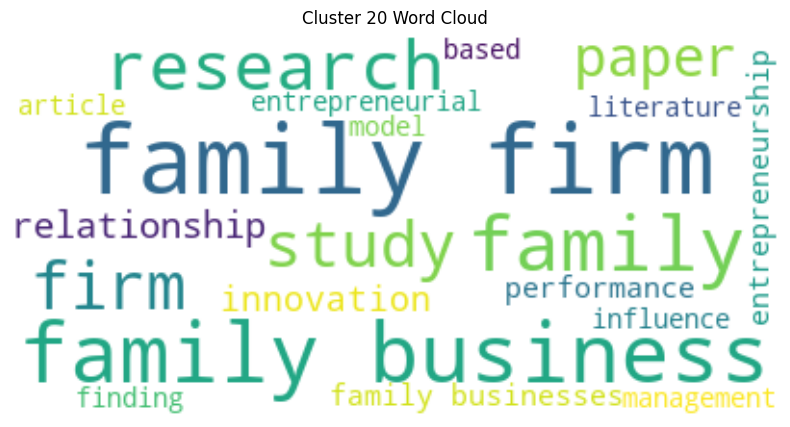

Top Documents containing 'family' in Cluster 20:
External knowledge has been found to be vital in generating innovation. However, little is known about the conditions under which firms can benefit from utilizing specific external knowledge sources. Using the knowledge-based view as our theoretical underpinning, we empirically examine how the usage of knowledge gained from market- and science-based sources influences innovation performance differently between family and non-family firms. An analysis using panel data drawn from Belgian firms supports our hypothesis that the relationship between the use of knowledge gained from suppliers and customers and innovation outcomes is weaker for family firms than for non-family firms, while the relationship between the use of knowledge gained from universities and research institutes and innovation outcomes is stronger for family firms. This study extends the literature by revealing the role firm type (i.e., family versus non-family) plays in mo

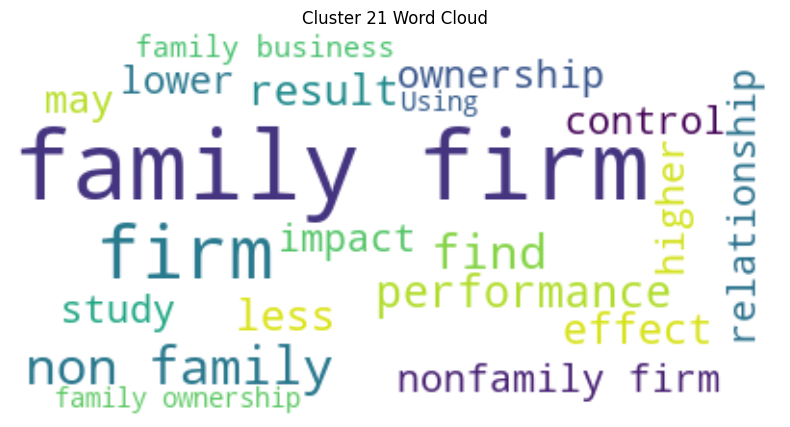

Top Documents containing 'family' in Cluster 21:
Based on the socioemotional wealth approach and a sample of 3,904 subsidiary ownership choices made by 586 family firms, this study shows that family-managed firms (i.e., those family firms with a family member in a leadership position) prefer wholly owned subsidies over joint ventures when entering foreign markets. Family-managed firms are also more likely to revise their subsidiary ownership choices and form joint ventures when in vulnerability conditions, that is, when they experience performance below aspirations and when entering a culturally distant market. 
This study examines gender equity - representation and compensation in top management - in listed family and non-family firms in the U.S. We integrate diversity, gender, and family firm perspectives, to understand how family firms vary from their non-family peers when making strategic choices about achieving gender parity in executive positions. Our empirical analyses confirm t

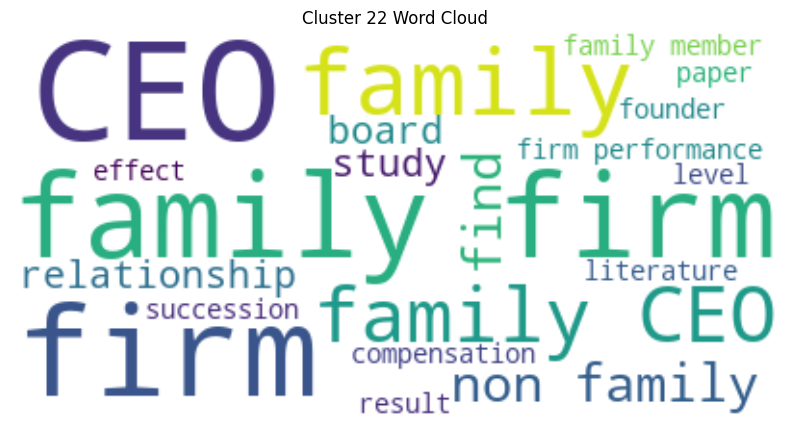

Top Documents containing 'family' in Cluster 22:
 The purpose of this paper is to analyse a key research hypothesis: Do firms ruled by managers have a greater rationale to implement a mergers and acquisitions (M&A) than (family) firms managed by their owners?  This paper uses an organizational-delegation-quantity oligopoly game to examine the profitability of M&As for firms that strategically delegate production decisions to managers versus family firms with no strategic delegation. This paper delimits the condition for delegation as aimed at increasing merger profitability: non-family CEOs will implement mergers more frequently than family CEOs and more so for inefficient firms because these require fewer synergies. The paper tests the main propositions with data on all M&As by small and medium firms in Spain in 2017 and 2018.  The greater the average operating margin of a firm, the more likely a merger, which is also more likely between non-family firms. The evidence of higher ex pos

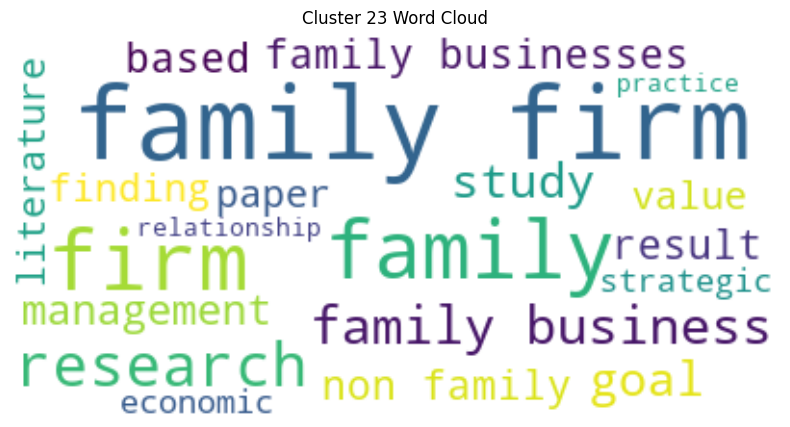

Top Documents containing 'family' in Cluster 23:
The reasons as to why family firms engage in corporate sustainability (CS) are poorly understood. In particular, those conditions that lead to a normative CS motivation, in which firms are driven by a sense of ethical responsibility, remain a theoretical black box. By integrating different theoretical explanations from research into family firms, CS and corporate governance, this study opens the black box and explains the interplay between family and firm antecedents, and how this affects normative CS motivation and hence CS performance. We empirically tested our hypotheses using survey-based data from a sample of 356 private family firms operating in Germany, Austria and Switzerland. Results of the structural equation model show that counteracting effects exist within a family firm, which influence CS motivation, thus providing a nuanced answer to the inconsistent findings of previous research, regarding the direction and magnitude of f

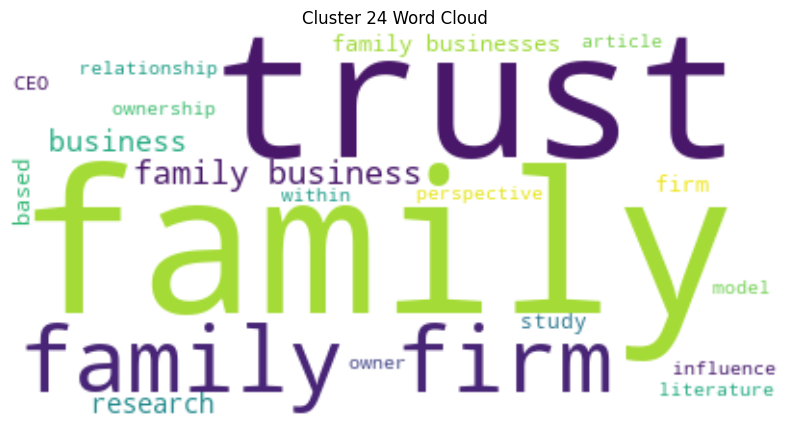

Top Documents containing 'family' in Cluster 24:
We depict Hollywood celebrity couples as business families who participate in the project-based movie production industry, which is a temporary and disaggregated form of organization where skilled individuals are linked to one another through contractual and social relationships. Appearing in Hollywood movies generates celebrity capital, which can be converted into economic capital through involvement in endorsements and other rent-generating activities. Finding projects is facilitated by membership in high-quality social networks, and we consider celebrity marriage as a means of merging two individuals social networks, which can be mutually beneficial for both parties. We develop and test three hypotheses about the quality of social networks prior to and after marriage and analyze their impact upon celebrities postmarriage career performance. We contribute to the family business literature by exploring hybridized and adaptive forms of b

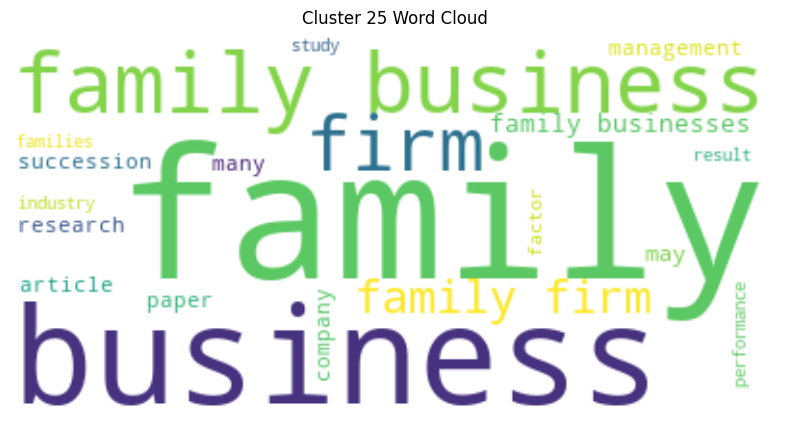

Top Documents containing 'family' in Cluster 25:
The way knowledge hiding co-exists with knowledge sharing in organizations remains under-researched and under-theorized. We focus on family farms, a context where knowledge sharing has been previously heralded as a critical activity for business continuity. We frame our study within stewardship theory and adopt a multiple case study research design. We draw on 51 in-depth interviews from 12 rural family farms in Cyprus. Our findings illustrate that members of farming business families act as stewards and behave in ways that facilitate the sharing or hiding of business knowledge. Business families act in secrecy and exhibit behaviors that can hide business knowledge in the presence of actors who are distrusted, since they carry a risk of knowledge appropriation. Conversely, they share knowledge with individuals they trust to fill resource gaps through behaving in an open manner. Our study contributes theoretically and empirically to the f

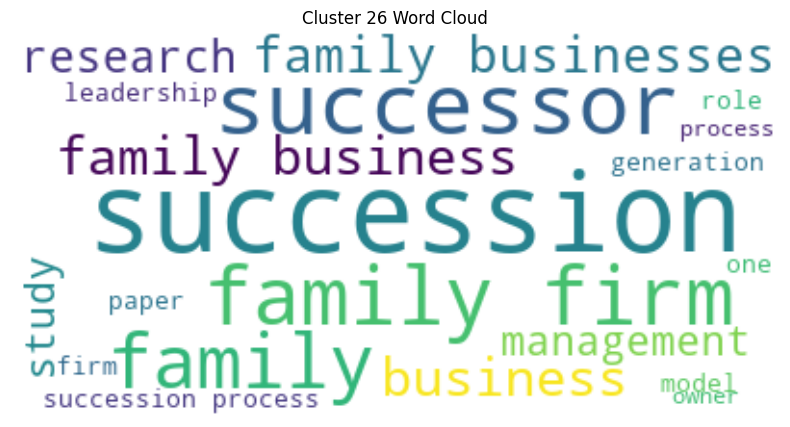

Top Documents containing 'family' in Cluster 26:
 The purpose of this paper is to elaborate on the preferences of parent founders within family businesses in selecting a suitable successor with the increase in life expectancy.  The study presents alternative decision-making preference models of a suitable succession for parent founders based on the models of microeconomic theory in the context of family businesses.  The theories and models of economics in the current study illustrate that the increase in the life expectancy of the parent founders with their decisions toward the preference of a suitable successor under the age constraint may restrict the sustainability of their family businesses. As a result, the opportunity cost theory appears as to be at the ahead of the other theories in microeconomics in order to support the decision making of parent founders on selecting the suitable successor for the future of the family business.  The paper illustrates the models on the preferenc

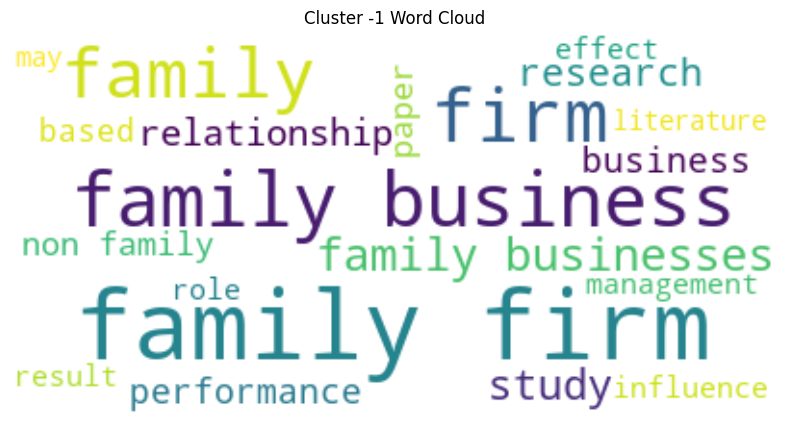

Top Documents containing 'family' in Cluster -1:
Current literature provides limited understanding on the processes through which interorganizational relationships contribute to social impact. We focus on a context, which is uniquely suited to understanding this phenomenon: a cooperative composed of family firms that operate in a rural community. We draw on stewardship and embeddedness perspectives to understand the way interorganizational relationships within a community and a cooperative allow family firms to engage in social impact. Relying on abductive logic and a qualitative multiple case study research, this study unveils the micro-processes and mechanisms through which interorganizational relationships within a cooperative and a community allow firms to operate on a continuum comprised of social value generation, sharing and replication practices. An embedded form of stewardship emerges as a core mechanism for interorganizational social impact activities. A conceptual model, bas

In [8]:
custom_words=['hypothesis','analysis','analyze','theories']
#how does BERT know if a word is alongwith another word
custom_stopwords=set(list(STOPWORDS)+custom_words)
for label in set(labels):
    cluster_text = ' '.join([docs[i] for i in range(len(docs)) if labels[i] == label])
    

    wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white',max_words=20).generate(cluster_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {label} Word Cloud')
    plt.axis('off')
    plt.show()

    target_topic = 'family'
    top_documents = [docs[i] for i in range(len(docs)) if labels[i] == label and target_topic in docs[i]]
    print(f"Top Documents containing '{target_topic}' in Cluster {label}:")
    for doc in top_documents[:10]:
        print(doc)
    print("\n")
    #topic heading
    #ouput in a word document

In [ ]:
px.scatter(df,x='doc_id',y='text length')

In [24]:
df.columns

Index(['doc_id', 'Year', 'Source title', 'SJR Best Quartile', 'DOI',
       'Document Type', 'text length', 'text'],
      dtype='object')

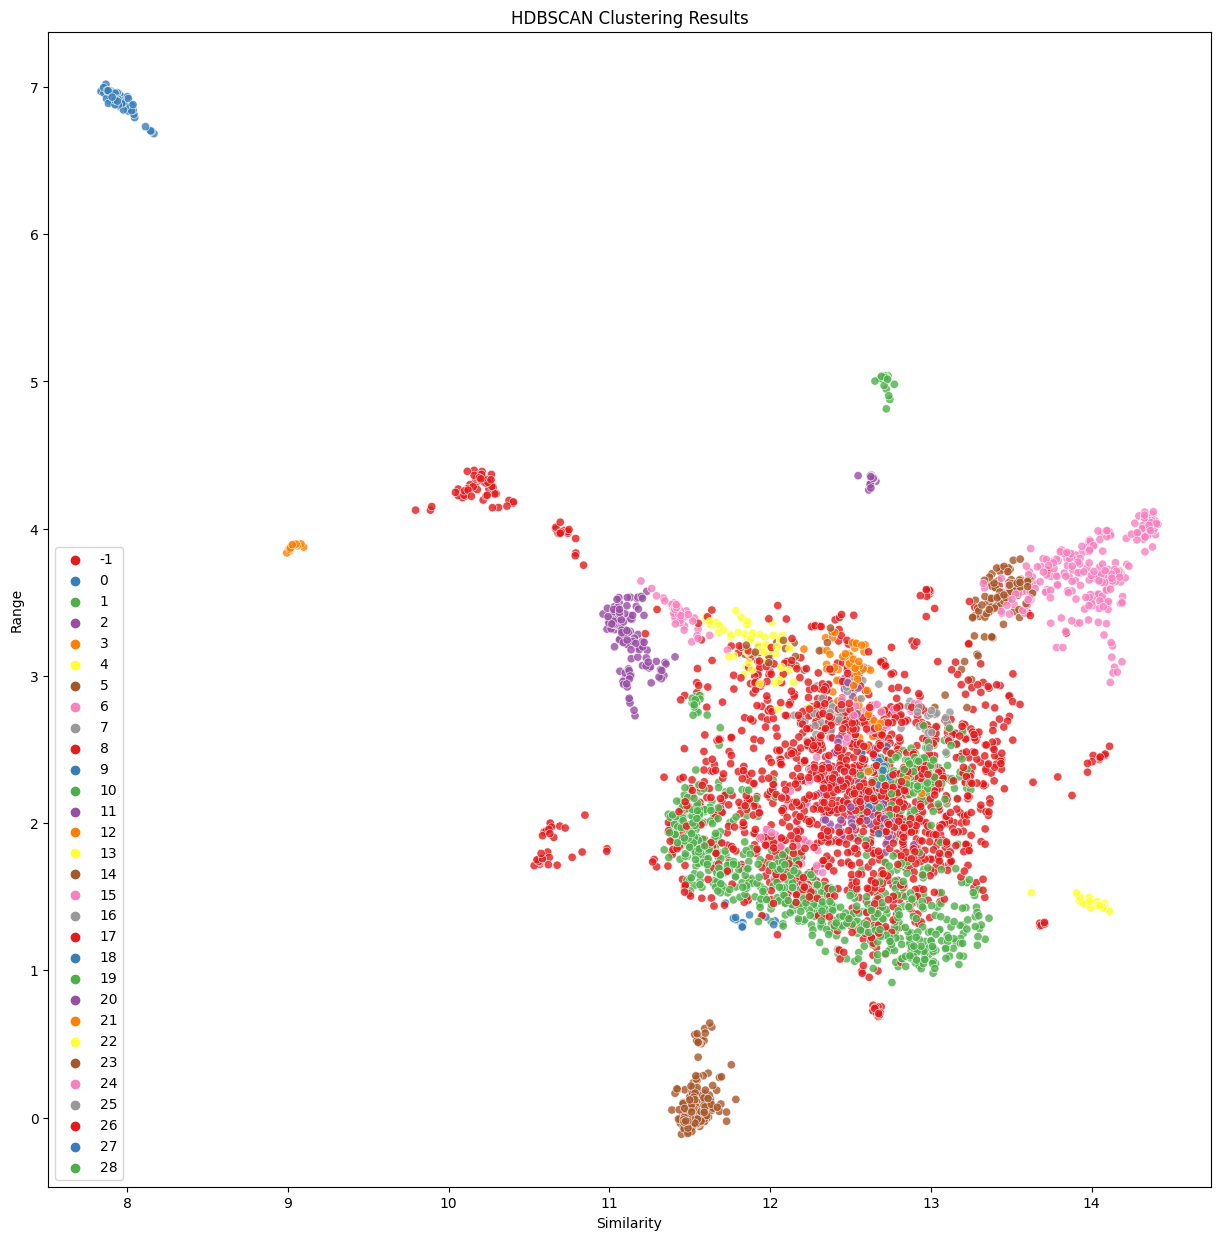

In [38]:
plt.figure(figsize=(15,15))
scatter=sns.scatterplot(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], hue=labels, palette='Set1', alpha=0.8)
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Similarity')
plt.ylabel('Range')
plt.legend()
plt.show()
